In [16]:
from calibration_metrics import partition_bins
import matplotlib.pyplot as plt
import torch
%matplotlib inline
plt.style.use('ggplot')

In [23]:
def plot_reliability_diagrams(fname, predictions, confidences, references):
    bins, _, bin_accs, _ = partition_bins(predictions, confidences, references)

    plt.bar(bins, bins, width=0.1, alpha=0.3, edgecolor='black', hatch='/')
    plt.bar(bins, bin_accs, width=0.1, alpha=0.7, edgecolor='black')
    plt.plot([0,1],[0,1], '--', color='gray', linewidth=2)
    plt.ylim([0, 1.05])
    plt.xlim([0, 1.05])
    plt.xlabel('Confidence')
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.savefig(f"figures/{fname}")
    
def load_outputs(path):
    predictions = torch.load(f"{path}/predictions.pt")
    confidences = torch.load(f"{path}/confidences.pt")
    references = torch.load(f"{path}/references.pt")
    
    return predictions, confidences, references

# Reliability Diagram
## CIFAR-10
### Uncalibrated

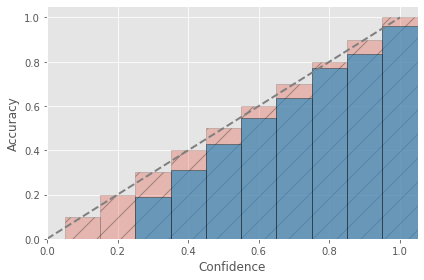

In [26]:
predictions, confidences, references = load_outputs("outputs/resnet_cifar-10_0.0235")

plot_reliability_diagrams("CIFAR-uncalibrated", predictions, confidences, references)

### Platt

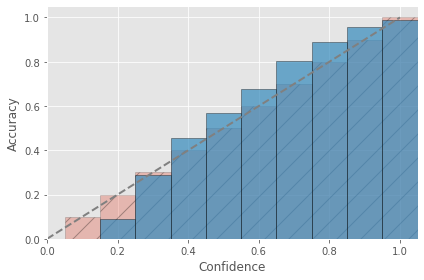

In [40]:
predictions, confidences, references = load_outputs("outputs/resnet-platt_cifar-10_0.0894")
plot_reliability_diagrams("CIFAR-Platt", predictions, confidences, references)

### Temperature

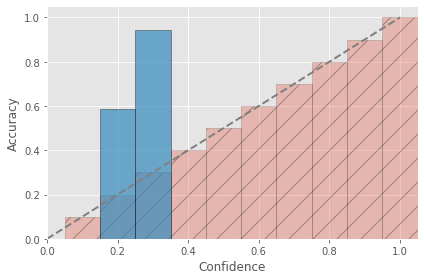

In [39]:
predictions, confidences, references = load_outputs("outputs/resnet-temp_cifar-10_0.5905")
plot_reliability_diagrams("CIFAR-Temp", predictions, confidences, references)

In [38]:
predictions, confidences, references

(tensor([3, 8, 8,  ..., 5, 1, 7]),
 tensor([0.2320, 0.2320, 0.2320,  ..., 0.2320, 0.2320, 0.2320]),
 tensor([3, 8, 8,  ..., 5, 1, 7]))

## SVHN
### Uncalibrated

In [28]:
predictions, confidences, references = load_outputs("outputs/resnet_SVHN_0.0129")
plot_reliability_diagrams("SVHN-uncalibrated", predictions, confidences, references)

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/resnet_SVHN_0.0129/predictions.pt'